In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy
import random
import math

from numpy.linalg import matrix_power
from numpy.linalg import solve

from collections import Counter

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

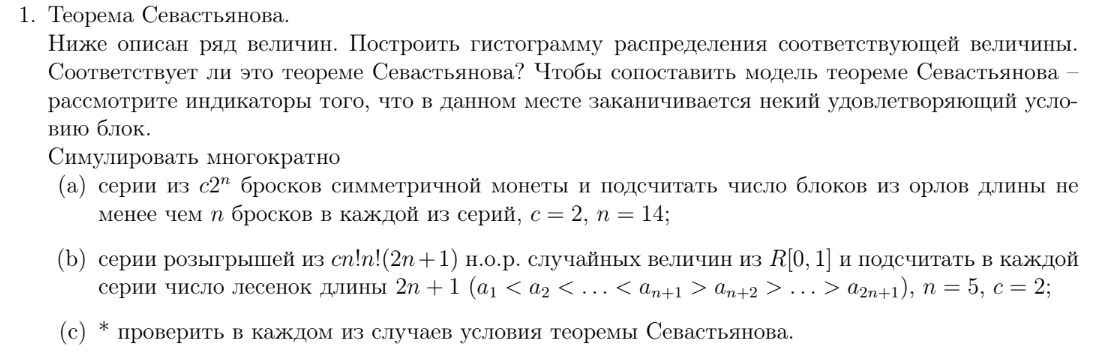

[2 2 6 2 1 2 2 1 1 4 1 1 1 2 5 3 1 0 3 3 2 0 1 1 0 3 1 0 2 3 1 1 4 2 1 1 1
 1 2 4 3 3 2 0 2 3 0 2 1 1 0 1 1 1 2 0 3 1 1 3 1 0 1 0 2 1 4 0 0 1 1 1 2 5
 5 0 2 2 1 2 2 3 1 2 2 1 0 3 1 1 0 5 0 1 2 0 4 4 2 2 1 5 2 0 2 2 2 2 0 3 2
 0 2 0 3 0 1 2 1 2 3 1 0 4 1 3 3 1 3 1 4 1 2 0 1 0 2 2 0 1 1 4 2 3 2 2 2 2
 4 2 0 3 1 2 4 4 1 4 4 2 2 1 2 0 0 2 3 4 0 0 2 1 1 2 1 2 5 3 1 2 2 2 1 4 3
 0 1 1 2 0 0 2 1 1 3 2 2 0 4 4 2 3 5 3 2 0 1 1 4 3 2 1 0 0 3 0 2 2 0 4 0 1
 1 2 5 0 1 4 3 3 1 1 1 1 1 2 6 1 4 3 4 2 2 3 0 2 2 0 0 5 3 4 2 2 3 2 4 1 2
 4 4 2 2 5 2 3 2 2 4 1 3 5 2 2 1 1 1 3 1 2 3 1 0 3 4 3 3 2 1 2 2 0 0 1 1 2
 0 1 2 1]


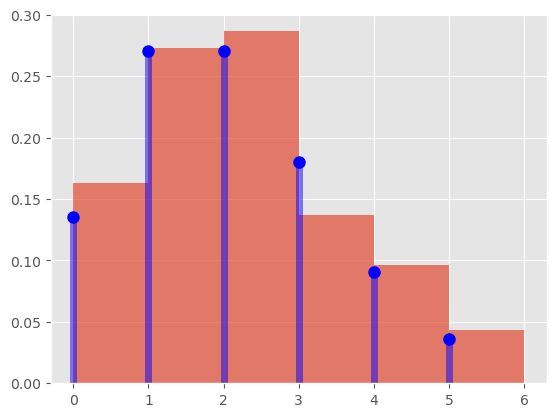

In [25]:
def isstair(seq):
    for i in range(1, n+1):
        if seq[i-1] >= seq[i]:
            return False
        
    for i in range(n+1, 2*n+1):
        if seq[i-1] <= seq[i]:
            return False
    return True

c = 2
n = 5

size = c*(math.factorial(n))**2 * (2*n+1)
count = []

#100 серий розыгрышей
for i in range(300):
    sample = st.uniform.rvs(size=size)
    tmp_count = 0
    for j in range(size-(2*n+1)):
        if isstair(sample[j:(j+2*n+1)]) == True:
            tmp_count += 1
    if tmp_count <= 100:
        count.append(tmp_count)

count = np.array(count)
print(count)
plt.hist(count, bins=6, density='True', alpha=0.7)
x = np.array([i for i in range(max(count))])
plt.plot(x, st.poisson.pmf(x, 2), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, st.poisson.pmf(x, 2), colors='b', lw=5, alpha=0.5)

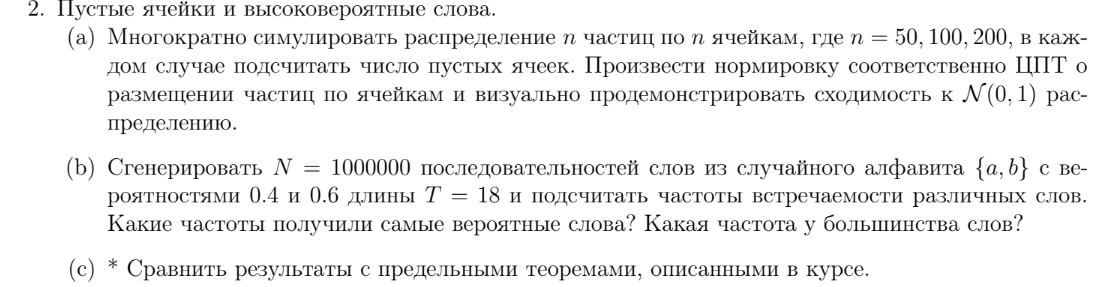

In [15]:
def gen_seq(t):
    return ''.join(random.choices(['a', 'b'], weights=[0.4, 0.6], k=T))

n = 10**6
t = 18

seqs = [gen_seq(t) for i in range(n)]
counter = Counter(seqs)

for word, count in counter.most_common(10):
    print('Слово', word, 'встречается', count)
    
few = 0
for count in word_counts.values():
    if count >= 2:
        few += 1

print('Частота >= 2:\n', few/n)

Слово bbbbbbbbbbbbbbbbbb встречается 103
Слово bbbbbbbbbbabbbbbbb встречается 77
Слово bbbbabbbbbbbbbbbbb встречается 77
Слово bbbbbbbbbbbbabbbbb встречается 75
Слово bbbbbbbbabbbbbbbbb встречается 74
Слово bbbabbbbbbbbbbbbbb встречается 74
Слово bbbbbbbbbabbbbbbbb встречается 73
Слово bbbbbbbbbbbbbbbabb встречается 70
Слово bbbbbbabbbbbbbbbbb встречается 69
Слово abbbbbbbbbbbbbbbbb встречается 68
Частота >= 2:
 0.175962


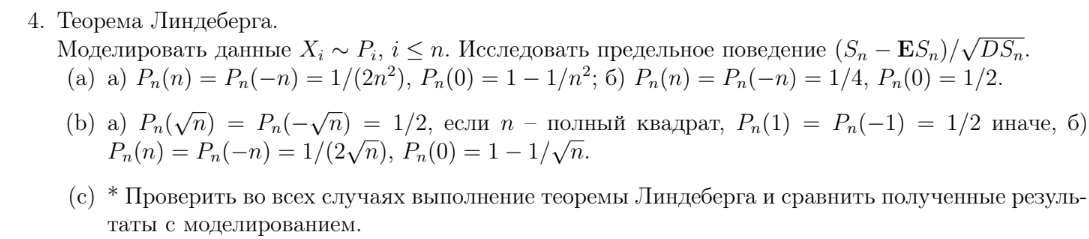

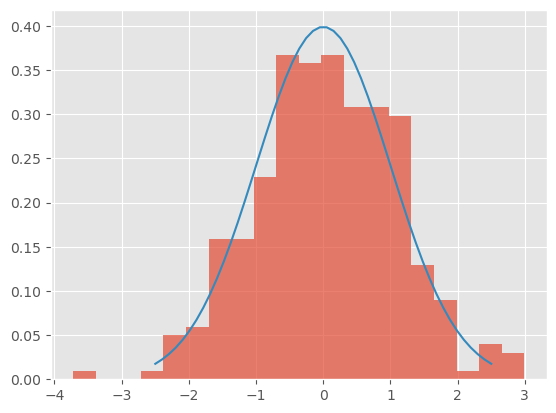

In [11]:
#a)
def gen_seq():
    seq = []
    for i in range(1, 1001):
        x = st.bernoulli(1/2).rvs()
        if x == 0:
            x = -1
        if i**0.5 == int(i**0.5):
            x *= int(i**0.5)
        seq.append(x)
    return seq

#сумма полные квадратов до n
def var(n):
    ans = 0
    for i in range(1, n+1):
        if i**0.5 == int(i**0.5):
            ans += i
        else:
            ans += 1
    return ans
            

data = []
for i in range(300):
    s = np.array(gen_seq())
    data.append(np.sum(s)/var(1000)**0.5)
    
plt.hist(data, density='True', bins=20, alpha=0.7)
t = np.linspace(-2.5, 2.5, 50)
plt.plot(t, st.norm.pdf(t))

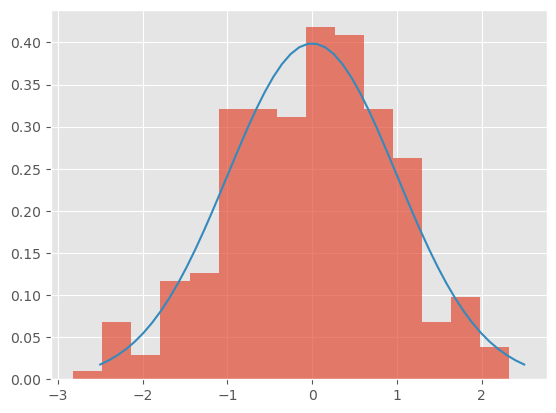

In [34]:
#б)
def gen_seq(n):
    seq = [int(np.random.choice([i,-i,0], p = [1/(2*i**0.5), 
                                    1/(2*i**0.5), 1 - 1/i**0.5])) for i in range(1, n+1)]
    return seq
               
def var(n):
    ans = 0
    for i in range(1, n+1):
        ans += i**(3/2)
    return ans

data = []
for i in range(300):
    s = np.array(gen_seq(1000))
    data.append(np.sum(s)/var(1000)**0.5)
    
plt.hist(data, density='True', bins=15, alpha=0.7)
t = np.linspace(-2.5, 2.5, 50)
plt.plot(t, st.norm.pdf(t))

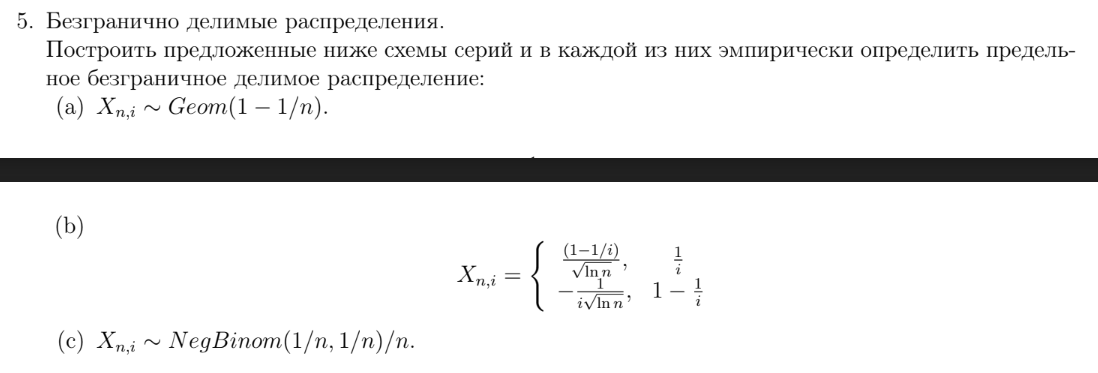

(array([0.02899932, 0.15272977, 0.29192653, 0.38472437, 0.45432275,
        0.28999324, 0.20492856, 0.07153167, 0.03866577, 0.01353302]),
 array([-2.22495323, -1.70718203, -1.18941082, -0.67163962, -0.15386841,
         0.36390279,  0.881674  ,  1.3994452 ,  1.9172164 ,  2.43498761,
         2.95275881]),
 <BarContainer object of 10 artists>)

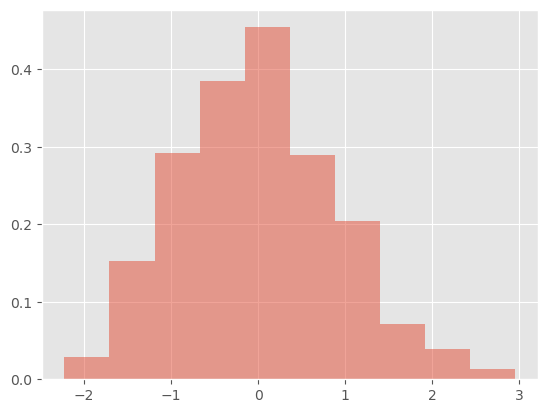

In [43]:
def gen_seq(n):
    data = []
    for i in range(1, n+1):
        tmp = np.random.choice([(1 - 1/i)/np.sqrt(np.log(n)), 
                                -1/(i*np.sqrt(np.log(n)))], p = [1/i, 1 - 1/i])
        data.append(tmp)
    return data

#число серий
m = 1000
data = []
for n in range(2, m+1):
    data.append(np.sum(np.array(gen_seq(n))))
    
    
plt.hist(data, density='True', bins=10, alpha=0.5)